## Using fbprophet to predict the Future of Kenya's Agriculture

In [1]:
import warnings; 
warnings.simplefilter('ignore')

In [4]:
%pip install prophet
from prophet import Prophet


[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [102]:
import pandas as pd
df=pd.read_csv("S:\code\Kenya-s-Maize-Output-Time-Series\FAOSTAT_data_en_3-26-2023.csv")
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,404,Kenya,5510,Production,01929.07,"Abaca, manila hemp, raw",1976,1976,tonnes,10.0,E,Estimated value
1,QCL,Crops and livestock products,404,Kenya,5510,Production,01929.07,"Abaca, manila hemp, raw",1977,1977,tonnes,10.0,E,Estimated value
2,QCL,Crops and livestock products,404,Kenya,5510,Production,01929.07,"Abaca, manila hemp, raw",1978,1978,tonnes,10.0,E,Estimated value
3,QCL,Crops and livestock products,404,Kenya,5510,Production,01929.07,"Abaca, manila hemp, raw",1979,1979,tonnes,10.0,E,Estimated value
4,QCL,Crops and livestock products,404,Kenya,5510,Production,01929.07,"Abaca, manila hemp, raw",1980,1980,tonnes,10.0,E,Estimated value


In [103]:
df2=pd.DataFrame()    

year=[]
value=[]
count=0
for i,j in zip(df['Item'],df['Unit']):
    if (i == 'Maize (corn)' and j=='hg/ha'):
        year.append(df.iloc[count,9])
        value.append(df.iloc[count,11])

    count+=1


print(year,value)

[1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021] [12533.0, 12222.0, 12500.0, 11714.0, 10713.0, 10792.0, 12000.0, 12536.0, 12741.0, 12250.0, 12174.0, 12538.0, 12897.0, 13448.0, 14138.0, 16352.0, 16261.0, 14557.0, 13000.0, 12000.0, 15786.0, 20712.0, 17692.0, 14437.0, 17222.0, 20343.0, 17169.0, 19030.0, 18526.0, 16591.0, 18321.0, 17271.0, 15549.0, 20400.0, 18759.0, 14506.0, 14713.0, 16697.0, 14817.0, 14400.0, 17012.0, 15126.0, 16224.0, 19293.0, 16405.0, 17197.0, 18132.0, 13925.0, 12943.0, 17251.0, 15840.0, 17366.0, 16922.0, 16602.0, 18230.0, 14284.0, 15272.0, 17656.0, 15600.0, 17741.0, 15231.0]


In [104]:
df2['ds']=year
df2['y']=value

In [105]:
df2.head()

,ds,y
0,1961,12533.0
1,1962,12222.0
2,1963,12500.0
3,1964,11714.0
4,1965,10713.0


In [106]:
# create Prophet model
m = Prophet()

model = m.fit(df2)

20:42:02 - cmdstanpy - INFO - Chain [1] start processing
20:42:03 - cmdstanpy - INFO - Chain [1] done processing


In [120]:
# make future dataframe with year values for next 5 years, upto 2027
future_df = m.make_future_dataframe(periods=60, freq='A')
future_df['year'] = future_df['ds'].apply(lambda x: x.year)

# make predictions for future dataframe
forecast = m.predict(future_df)

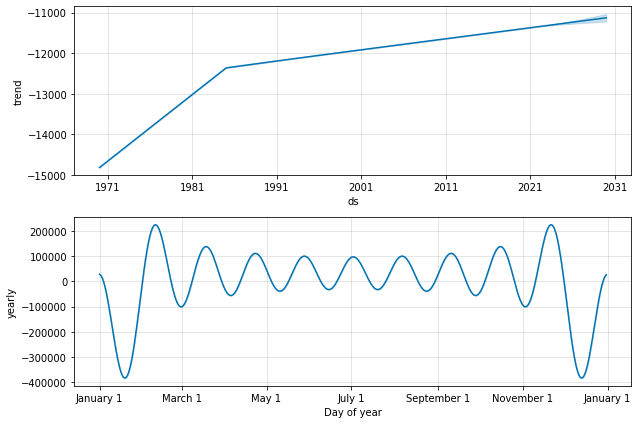

In [121]:
plot1 = m.plot_components(forecast)


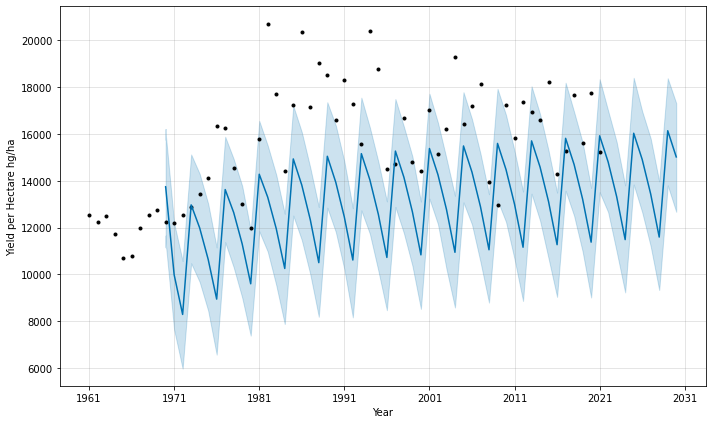

In [122]:
plt2 = m.plot(forecast, xlabel='Year', ylabel='Yield per Hectare hg/ha')

### Evaluating the model


In [124]:
from sklearn.metrics import mean_absolute_error

In [125]:
# split the data into training and testing sets
train_size = int(len(df2) * 0.8)
train_data = df2[:train_size]
test_data = df2[train_size:]

In [126]:
# define a list of models to evaluate
models = []
models.append(('model_1', Prophet()))
models.append(('model_2', Prophet(growth='linear', changepoint_prior_scale=0.05)))
models.append(('model_3', Prophet(seasonality_mode='multiplicative')))

# evaluate each model using MAE
for name, model in models:
    model.fit(train_data)
    future = model.make_future_dataframe(periods=len(test_data))
    forecast = model.predict(future)[-len(test_data):]
    mae = mean_absolute_error(test_data['y'], forecast['yhat'])
    print(f'{name}: MAE={mae:.2f}')

20:47:26 - cmdstanpy - INFO - Chain [1] start processing
20:47:27 - cmdstanpy - INFO - Chain [1] done processing
20:47:27 - cmdstanpy - INFO - Chain [1] start processing


model_1: MAE=89381.14


20:47:28 - cmdstanpy - INFO - Chain [1] done processing
20:47:28 - cmdstanpy - INFO - Chain [1] start processing


model_2: MAE=89381.14


20:47:29 - cmdstanpy - INFO - Chain [1] done processing


model_3: MAE=47985.73


In [127]:
#The forecasted values are stored in the yhat column of the forecast dataframe. 
forecasted_values = forecast['yhat']
print(forecasted_values.tail(10).round(2))

51      506.60
52    -7148.93
53   -16178.16
54   -26319.28
55   -37278.39
56   -48737.44
57   -60362.82
58   -71814.35
59   -82754.38
60   -92856.93
Name: yhat, dtype: float64
